<a href="https://colab.research.google.com/github/NumbLime/MPC-control-for-RC-model/blob/main/test1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import requests

# url for the BOPTEST service
url = 'http://api.boptest.net'

# Select test case and get identifier
testcase = 'bestest_hydronic_heat_pump'
# Check if already started a test case and stop it if so before starting another
try:
  requests.put('{0}/stop/{1}'.format(url, testid))
except:
  pass
# Select and start a new test case
testid = \
requests.post('{0}/testcases/{1}/select'.format(url,testcase)).json()['testid']

In [34]:
# Get test case name
name = requests.get('{0}/name/{1}'.format(url, testid)).json()['payload']
print(name)

# Get BOPTEST version
version = requests.get('{0}/version'.format(url)).json()['payload']
print(version)

{'name': 'bestest_hydronic_heat_pump'}
{'version': '0.6.0', 'service-version': '0.4.0'}


In [35]:
# Get inputs available
inputs = requests.get('{0}/inputs/{1}'.format(url, testid)).json()['payload']
print('TEST CASE INPUTS ---------------------------------------------')
print(inputs.keys())
# Get measurements available
print('TEST CASE MEASUREMENTS ---------------------------------------')
measurements = requests.get('{0}/measurements/{1}'.format(url, testid)).json()['payload']
print(measurements.keys())

TEST CASE INPUTS ---------------------------------------------
dict_keys(['oveFan_activate', 'oveFan_u', 'oveHeaPumY_activate', 'oveHeaPumY_u', 'ovePum_activate', 'ovePum_u', 'oveTSet_activate', 'oveTSet_u'])
TEST CASE MEASUREMENTS ---------------------------------------
dict_keys(['reaCO2RooAir_y', 'reaCOP_y', 'reaPFan_y', 'reaPHeaPum_y', 'reaPPumEmi_y', 'reaQFloHea_y', 'reaQHeaPumCon_y', 'reaQHeaPumEva_y', 'reaTRet_y', 'reaTSetCoo_y', 'reaTSetHea_y', 'reaTSup_y', 'reaTZon_y', 'weaSta_reaWeaCeiHei_y', 'weaSta_reaWeaCloTim_y', 'weaSta_reaWeaHDifHor_y', 'weaSta_reaWeaHDirNor_y', 'weaSta_reaWeaHGloHor_y', 'weaSta_reaWeaHHorIR_y', 'weaSta_reaWeaLat_y', 'weaSta_reaWeaLon_y', 'weaSta_reaWeaNOpa_y', 'weaSta_reaWeaNTot_y', 'weaSta_reaWeaPAtm_y', 'weaSta_reaWeaRelHum_y', 'weaSta_reaWeaSolAlt_y', 'weaSta_reaWeaSolDec_y', 'weaSta_reaWeaSolHouAng_y', 'weaSta_reaWeaSolTim_y', 'weaSta_reaWeaSolZen_y', 'weaSta_reaWeaTBlaSky_y', 'weaSta_reaWeaTDewPoi_y', 'weaSta_reaWeaTDryBul_y', 'weaSta_reaWeaTWetBu

In [36]:
y = requests.put('{0}/initialize/{1}'.format(url, testid),
                 json={'start_time':   31*24*3600,
                       'warmup_period': 7*24*3600}).json()['payload']
print(y['reaTZon_y']-273.15)
print(y['time']/24/3600)

21.364471442540776
31.0


In [37]:
scenario_return = requests.put('{0}/scenario/{1}'.format(url, testid),
                  json={'time_period':'peak_heat_day',
                        'electricity_price':'dynamic'}).json()['payload']

In [38]:
y = scenario_return['time_period']
start_time_days = y['time']/24/3600
print(y['reaTZon_y']-273.15)
print(y['time']/24/3600)
print(scenario_return['electricity_price'])

21.3144011115877
16.0
dynamic


In [39]:
# Get default control step
step = requests.get('{0}/step/{1}'.format(url, testid)).json()['payload']
print('DEFAULT STEP PERIOD [seconds] --------------------------------')
print(step)
# Set the control step
requests.put('{0}/step/{1}'.format(url, testid), json={'step':step})

DEFAULT STEP PERIOD [seconds] --------------------------------
3600


<Response [200]>

In [40]:
y = requests.post('{0}/advance/{1}'.format(url, testid)).json()['payload']
print(y['reaTZon_y']-273.15)
print(y['time']/24/3600)

21.40640845131327
16.041666666666668


In [41]:
u = {'oveHeaPumY_u':0.5,
     'oveHeaPumY_activate': 1}
y = requests.post('{0}/advance/{1}'.format(url, testid), json=u).json()['payload']
print(y['reaTZon_y']-273.15)
print(y['time']/24/3600)

21.415462614705405
16.083333333333332


In [42]:
u = {'oveHeaPumY_u':0.9,
     'oveHeaPumY_activate': 1}
y = requests.post('{0}/advance/{1}'.format(url, testid), json=u).json()['payload']

In [43]:
u = {'oveHeaPumY_u':0.2,
     'oveHeaPumY_activate': 1}
y = requests.post('{0}/advance/{1}'.format(url, testid), json=u).json()['payload']

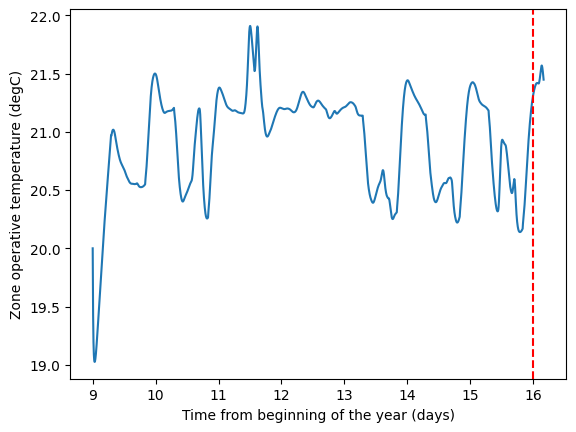

In [44]:
import numpy as np
import matplotlib.pyplot as plt

args = {'point_names':['reaTZon_y'],'start_time':-365*24*3600, 'final_time':365*24*3600}
res = requests.put('{0}/results/{1}'.format(url, testid), json=args).json()['payload']
plt.plot(np.asarray(res['time'])/24/3600, np.asarray(res['reaTZon_y'])-273.15)
plt.xlabel('Time from beginning of the year (days)')
plt.ylabel('Zone operative temperature (degC)')
plt.axvline(start_time_days, linestyle='--', color='r')

In [45]:
requests.get('{0}/kpi/{1}'.format(url, testid)).json()['payload']

{'tdis_tot': 0,
 'idis_tot': 0,
 'ener_tot': 0.057149858113444155,
 'cost_tot': 0.013618811188433742,
 'emis_tot': 0.009544026304945176,
 'pele_tot': 0.01824195421498472,
 'pgas_tot': None,
 'pdih_tot': None,
 'time_rat': 2.8669922440140337e-05}

In [46]:
# Reinitialize the test scenario
requests.put('{0}/scenario/{1}'.format(url, testid),
              json={'time_period':'peak_heat_day',
                    'electricity_price':'dynamic'}).json()
# Set the control step to one year
requests.put('{0}/step/{1}'.format(url, testid), json={'step':365*24*3600})
# Advance the simulation with no control overwrite
requests.post('{0}/advance/{1}'.format(url, testid), json={}).json()
# Get and print the KPIs
kpis_bas = requests.get('{0}/kpi/{1}'.format(url, testid)).json()['payload']
kpis_bas

{'tdis_tot': 8.381692942513078,
 'idis_tot': 0,
 'ener_tot': 3.4777725656013834,
 'cost_tot': 0.8827810790417875,
 'emis_tot': 0.5807880184554309,
 'pele_tot': 0.01891307030662192,
 'pgas_tot': None,
 'pdih_tot': None,
 'time_rat': 2.691808152416525e-06}

In [47]:
import pandas as pd
def get_and_plot_results(testid, start_time, final_time):
    '''
    Get and plot result key trajectories from the test case.

    The key trajectories are zone operative temperature, zone heating and
    cooling set points, heat pump electrical power, outside air dry bulb
    temperature, and outside direct normal solar irradiation.

    Parameters
    ----------
    testid : str
      The testid for the test case.
    start_time : float or int
      The start time in seconds from the beginning of the year for data.
    final_time : float or int
      The final time in seconds from the beginning of the year for data.

    Returns
    -------
    None

    '''
    df_res = pd.DataFrame()
    points = ['reaTZon_y', 'reaTSetHea_y', 'reaTSetCoo_y', 'oveHeaPumY_u',
              'weaSta_reaWeaTDryBul_y', 'weaSta_reaWeaHDirNor_y']
    args = {'point_names':points,
            'start_time':start_time,
            'final_time':final_time}
    res = requests.put('{0}/results/{1}'.format(url, testid),
                        json=args).json()['payload']
    df_res = pd.DataFrame(data=res)
    df_res.set_index('time')
    plt.close()
    _, axs = plt.subplots(3, sharex=True, figsize=(10,8))
    x_time = df_res.index/3600./24.
    # Plot operative temperature
    axs[0].plot(x_time, df_res['reaTZon_y']    - 273.15, 'darkorange',
                linestyle='-', linewidth=0.8, label='$T_z$')
    axs[0].plot(x_time, df_res['reaTSetHea_y'] - 273.15, 'gray',
                linewidth=0.8, label='Comfort setp.')
    axs[0].plot(x_time, df_res['reaTSetCoo_y'] - 273.15, 'gray',
                linewidth=0.8, label='_nolegend_')
    axs[0].set_yticks(np.arange(15, 31, 5))
    axs[0].set_ylabel('Operative\ntemperature\n($^\circ$C)')
    axs[0].legend()
    # Plot heat pump electrical power
    axs[1].plot(x_time, df_res['oveHeaPumY_u'], 'darkorange',
                linestyle='-', linewidth=0.8, label='$P_{hp}$')
    axs[1].set_ylabel('Heat pump\nmodulation\nsignal\n( - )')
    axs[1].legend()
    # Plot disturbances
    axs[2].plot(x_time, df_res['weaSta_reaWeaTDryBul_y'] - 273.15, 'royalblue',
                linestyle='-', linewidth=0.8, label='$T_a$')
    axs[2].set_ylabel('Ambient\ntemperature\n($^\circ$C)')
    axs[2].set_yticks(np.arange(-5, 16, 5))
    axs[2].legend(loc='upper left')
    axs[2].set_xlabel('Day of the year')
    axt = axs[2].twinx()
    axt.plot(x_time, df_res['weaSta_reaWeaHDirNor_y'], 'gold',
             linestyle='-', linewidth=0.8, label='$\dot{Q}_{rad}$')
    axt.set_ylabel('Solar\nirradiation\n($W$)')
    axt.legend(loc='upper right')
    plt.show()

    return None

In [ ]:
get_and_plot_results(testid, start_time=start_time_days*24*3600, final_time=365*24*3600)

In [50]:
# Initialize scenario
y = requests.put('{0}/scenario/{1}'.format(url, testid),
                 json={'time_period':'peak_heat_day',
                       'electricity_price':'dynamic'}).json()['payload']['time_period']
# Set control step
requests.put('{0}/step/{1}'.format(url, testid), json={'step':3600})
# Instantiate controller
con = Controller_Proportional(TSet=273.15+21, k_p=5.)
# Simulation loop
from IPython.display import clear_output
while y:
    # Clear the display output at each step
    clear_output(wait=True)
    # Print the current operative temperature and simulation time
    print('-------------------------------------------------------------------')
    print('Operative temperature [degC]  = {:.2f}'.format(y['reaTZon_y']-273.15))
    simulation_time_days = y['time']/3600/24
    print('Simulation time [elapsed days] = {:.2f}'.format((simulation_time_days - \
                                                    start_time_days)))
    print('-------------------------------------------------------------------')
    # Compute control signal
    u = con.compute_control(y)
    # Advance simulation with control signal
    y = requests.post('{0}/advance/{1}'.format(url, testid), json=u).json()['payload']


-------------------------------------------------------------------
Operative temperature [degC]  = 20.91
Simulation time [elapsed days] = 14.00
-------------------------------------------------------------------


In [ ]:
get_and_plot_results(testid, start_time=start_time_days*24*3600, final_time=365*24*3600)

In [52]:
kpis_con = requests.get('{0}/kpi/{1}'.format(url, testid)).json()['payload']
kpis_con

{'tdis_tot': 19.94343344356707,
 'idis_tot': 0,
 'ener_tot': 2.775098374530354,
 'cost_tot': 0.7053934625011848,
 'emis_tot': 0.4634414285465692,
 'pele_tot': 0.020673254360232787,
 'pgas_tot': None,
 'pdih_tot': None,
 'time_rat': 0.00022757685070496907}

In [53]:
kpis_bas

{'tdis_tot': 8.381692942513078,
 'idis_tot': 0,
 'ener_tot': 3.4777725656013834,
 'cost_tot': 0.8827810790417875,
 'emis_tot': 0.5807880184554309,
 'pele_tot': 0.01891307030662192,
 'pgas_tot': None,
 'pdih_tot': None,
 'time_rat': 2.691808152416525e-06}

In [54]:
# Set to true if want to stop test case
# Note: following code cells will not work if test case is stopped and not restarted first
stop = True
if stop:
  requests.put('{0}/stop/{1}'.format(url, testid))

# 新段落

In [49]:
class Controller_Proportional(object):

    def __init__(self, TSet=273.15+21, k_p=10.):
        '''Constructor.

        Parameters
        ----------
        TSet : float, optional
            Temperature set-point in Kelvin.
        k_p : float, optional
            Proportional gain.

        '''

        self.TSet = TSet
        self.k_p  = k_p

    def compute_control(self, y):
        '''Compute the control input from the measurement.

        Parameters
        ----------
        y : dict
            Contains the current values of the measurements.
            {<measurement_name>:<measurement_value>}

        Returns
        -------
        u : dict
            Defines the control input to be used for the next step.
            {<input_name> : <input_value>}

        '''

        # Compute control
        if y['reaTZon_y']<self.TSet:
            e = self.TSet - y['reaTZon_y']
        else:
            e = 0

        value = self.k_p*e
        u = {'oveHeaPumY_u':value,
             'oveHeaPumY_activate': 1}

        return u